In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Loading the txt file
df=pd.read_csv("ModelingData.txt", sep="\t")
# Printing first 5 rows
df.head(5)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1.0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,67.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,2.0,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,22.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
2,3.0,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
3,4.0,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,45.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
4,5.0,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,53.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


In [3]:
# drops Observation No column because it is not important for prediction
df.drop("OBS#", axis = 1, inplace = True)

In [4]:
# Printing dimension of dataset (Rows, Columns)
df.shape

(1002, 31)

In [5]:
# Information about Null Values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 31 columns):
CHK_ACCT            1000 non-null float64
DURATION            1000 non-null float64
HISTORY             1000 non-null float64
NEW_CAR             1000 non-null float64
USED_CAR            1000 non-null float64
FURNITURE           1000 non-null float64
RADIO/TV            1000 non-null float64
EDUCATION           1000 non-null float64
RETRAINING          1000 non-null float64
AMOUNT              1000 non-null float64
SAV_ACCT            1000 non-null float64
EMPLOYMENT          1000 non-null float64
INSTALL_RATE        1000 non-null float64
MALE_DIV            1000 non-null float64
MALE_SINGLE         1000 non-null float64
MALE_MAR_or_WID     1000 non-null float64
CO-APPLICANT        1000 non-null float64
GUARANTOR           1000 non-null float64
PRESENT_RESIDENT    1000 non-null float64
REAL_ESTATE         1000 non-null float64
PROP_UNKN_NONE      1000 non-null float64
AGE        

In [6]:
# Prints number of null value in each columns
df.isnull().sum()

CHK_ACCT            2
DURATION            2
HISTORY             2
NEW_CAR             2
USED_CAR            2
FURNITURE           2
RADIO/TV            2
EDUCATION           2
RETRAINING          2
AMOUNT              2
SAV_ACCT            2
EMPLOYMENT          2
INSTALL_RATE        2
MALE_DIV            2
MALE_SINGLE         2
MALE_MAR_or_WID     2
CO-APPLICANT        2
GUARANTOR           2
PRESENT_RESIDENT    2
REAL_ESTATE         2
PROP_UNKN_NONE      2
AGE                 2
OTHER_INSTALL       2
RENT                2
OWN_RES             2
NUM_CREDITS         2
JOB                 2
NUM_DEPENDENTS      2
TELEPHONE           2
FOREIGN             2
RESPONSE            2
dtype: int64

# Data Cleaning

In [7]:
# For Numerical Data
df.skew()

CHK_ACCT            0.006957
DURATION            1.094184
HISTORY            -0.011886
NEW_CAR             1.258466
USED_CAR            2.616121
FURNITURE           1.659555
RADIO/TV            0.981431
EDUCATION           4.135689
RETRAINING          2.727454
AMOUNT              1.949628
SAV_ACCT            1.016677
EMPLOYMENT         -0.117615
INSTALL_RATE       -0.531348
MALE_DIV            4.135689
MALE_SINGLE        -0.193181
MALE_MAR_or_WID     2.827519
CO-APPLICANT        4.636536
GUARANTOR           4.041610
PRESENT_RESIDENT   -0.272570
REAL_ESTATE         0.970403
PROP_UNKN_NONE      1.920051
AGE                 1.020739
OTHER_INSTALL       1.616379
RENT                1.677217
OWN_RES            -0.943140
NUM_CREDITS         1.272576
JOB                -0.374295
NUM_DEPENDENTS      1.909445
TELEPHONE           0.391868
FOREIGN             4.913027
RESPONSE           -0.874183
dtype: float64

In general

Skew value is less than -0.5 -> Left Skewed

Skew value between -0.5 to 0.5 -> Normalized data

Skew value is greater than 0.5 -> Right Skewed

There are few values in the columns which have no values, which in turn leads to inconsistency during prediction. Thus, we replace these values and it is done as follows:

1. Check for skewness of the particular feature.
2. If it is normalized we replace it with the Mean value.
3. If it is Right-skewed or Left-skewed we replace it with the Median value.

In [8]:
# Listing the columns according to the skewness
df1 = pd.DataFrame([df.skew()])
Normalized_Data=[]
Right_Skew=[]
Left_Skew=[]
for label in df.columns:
    if df1[label][0] < -0.5:
        Left_Skew.append(label)
    elif df1[label][0] <=0.5:
        Normalized_Data.append(label)
    else:
        Right_Skew.append(label)

In [9]:
# Prints columns name which are Left Skewed
Left_Skew

['INSTALL_RATE', 'OWN_RES', 'RESPONSE']

In [10]:
# Prints columns name which are Normal
Normalized_Data

['CHK_ACCT',
 'HISTORY',
 'EMPLOYMENT',
 'MALE_SINGLE',
 'PRESENT_RESIDENT',
 'JOB',
 'TELEPHONE']

In [11]:
# Prints columns name which are Right Skewed
Right_Skew

['DURATION',
 'NEW_CAR',
 'USED_CAR',
 'FURNITURE',
 'RADIO/TV',
 'EDUCATION',
 'RETRAINING',
 'AMOUNT',
 'SAV_ACCT',
 'MALE_DIV',
 'MALE_MAR_or_WID',
 'CO-APPLICANT',
 'GUARANTOR',
 'REAL_ESTATE',
 'PROP_UNKN_NONE',
 'AGE',
 'OTHER_INSTALL',
 'RENT',
 'NUM_CREDITS',
 'NUM_DEPENDENTS',
 'FOREIGN']

In [12]:
# Replacing NaN value on the basis of skewness

# For Normalized data
for label in Normalized_Data:
    df[label].fillna(round(df[label].mean()),inplace=True) # Round() function is used because some coloumns are binary so by rounding value will become integer

# For Left and Right Skewness
for label in Right_Skew+Left_Skew:
    df[label].fillna(df[label].median(),inplace=True)

In [13]:
# Crosschecks that number of null value in each column
df.isnull().sum()

CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

Now we can see that there are ni null value in any column

# Data Visualisation

In [14]:
# Prints first five rows of dataset
df.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1169.0,...,67.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5951.0,...,22.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
2,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2096.0,...,49.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
3,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,7882.0,...,45.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
4,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4870.0,...,53.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


In [15]:
# Prints columns name of the dataset
df.columns

Index(['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE',
       'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT',
       'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

0.0    952
1.0     50
Name: MALE_DIV, dtype: int64

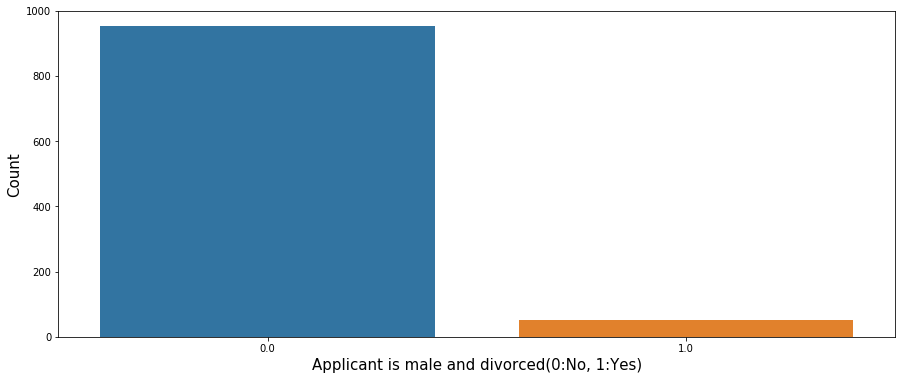

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(df["MALE_DIV"])
plt.xlabel("Applicant is male and divorced(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["MALE_DIV"].value_counts()

Here we can see that very few applicant are male and divorced

1.0    550
0.0    452
Name: MALE_SINGLE, dtype: int64

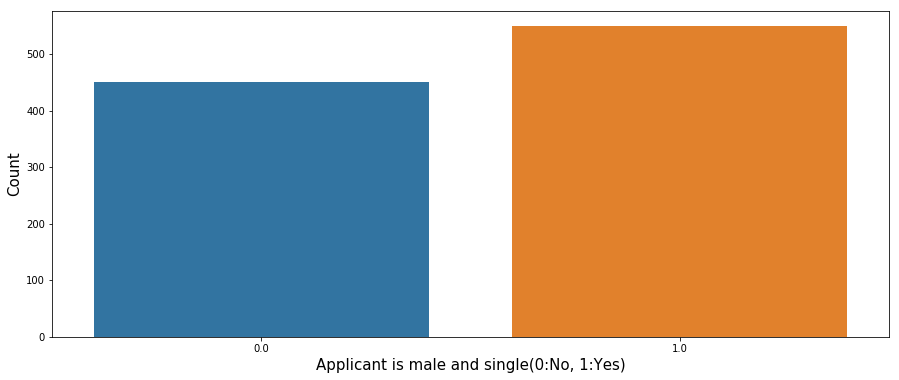

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(df["MALE_SINGLE"])
plt.xlabel("Applicant is male and single(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["MALE_SINGLE"].value_counts()

We can see that there are more number of male applicant who are single

0.0    910
1.0     92
Name: MALE_MAR_or_WID, dtype: int64

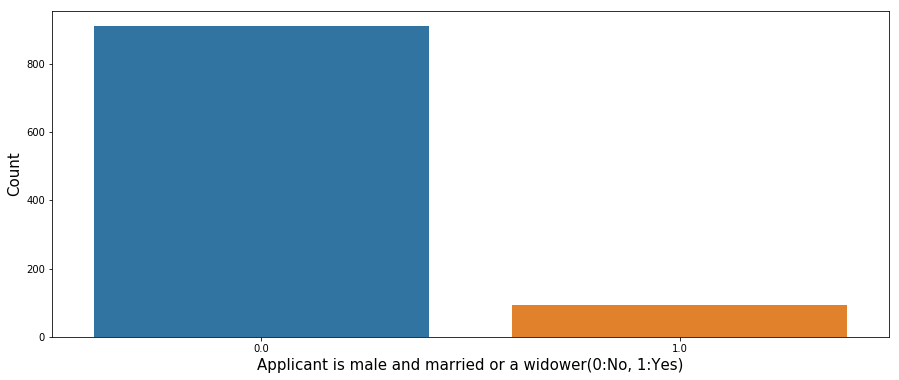

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(df["MALE_MAR_or_WID"])
plt.xlabel("Applicant is male and married or a widower(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["MALE_MAR_or_WID"].value_counts()

We can see that thare are very few applicant who are male or a winower

0.0    961
1.0     41
Name: CO-APPLICANT, dtype: int64

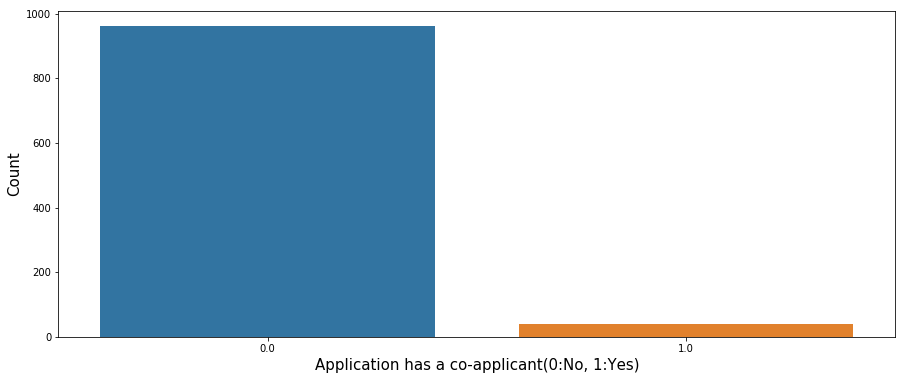

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(df["CO-APPLICANT"])
plt.xlabel("Application has a co-applicant(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["CO-APPLICANT"].value_counts()

We can see that there are very few application which has a co-appicant

Nature of JOB
**************
0.0 : unemployed/ unskilled  - non-resident
1.0 : unskilled - resident
2.0 : skilled employee / official
3.0 : management/ self-employed/highly qualified employee/ officer


2.0    632
1.0    200
3.0    148
0.0     22
Name: JOB, dtype: int64

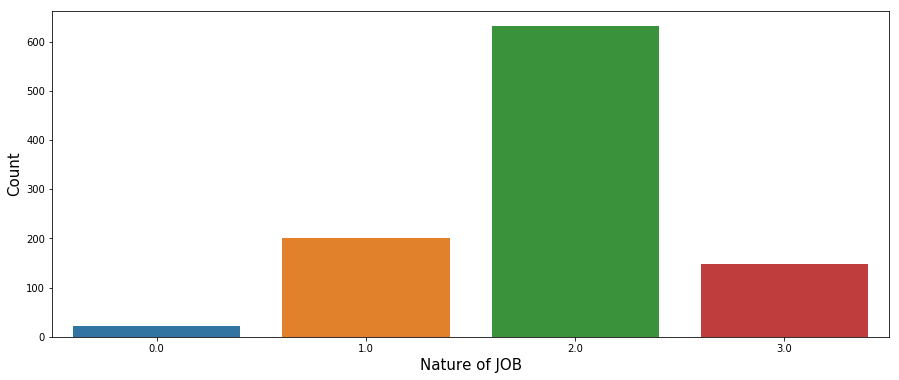

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(df["JOB"])
plt.xlabel("Nature of JOB", fontsize=15)
plt.ylabel("Count", fontsize=15)

print("Nature of JOB\n**************\n0.0 : unemployed/ unskilled  - non-resident\n1.0 : unskilled - resident\n2.0 : skilled employee / official\n3.0 : management/ self-employed/highly qualified employee/ officer")
df["JOB"].value_counts()

We can see that there are most of the employee are skilled followed by unskilled and then followed by management and only few employee are unskilled

Nature of JOB
**************
0.0 : unemployed/ unskilled  - non-resident
1.0 : unskilled - resident
2.0 : skilled employee / official
3.0 : management/ self-employed/highly qualified employee/ officer


Credit Rating is good
*******************************
0.0:No
1.0:Yes


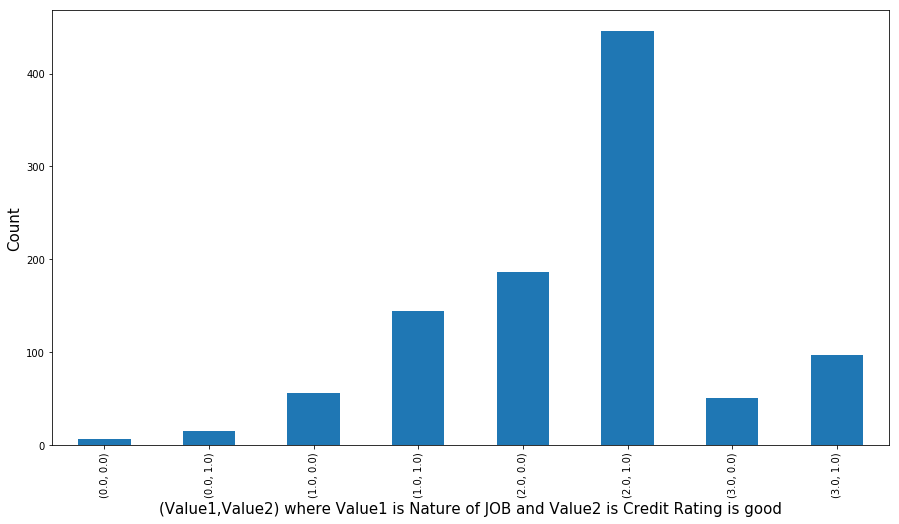

In [21]:
plt.figure(figsize=(15,8))
df.groupby(["JOB","RESPONSE"]).size().plot(kind="bar")
plt.ylabel("Count", fontsize=15)
plt.xlabel("(Value1,Value2) where Value1 is Nature of JOB and Value2 is Credit Rating is good", fontsize=15)
print("Nature of JOB\n**************\n0.0 : unemployed/ unskilled  - non-resident\n1.0 : unskilled - resident\n2.0 : skilled employee / official\n3.0 : management/ self-employed/highly qualified employee/ officer\n\n\nCredit Rating is good\n*******************************\n0.0:No\n1.0:Yes")

We can see that most of the good credit rater are from skilled employee and very few are from unskilled employee

0.0    598
1.0    404
Name: TELEPHONE, dtype: int64

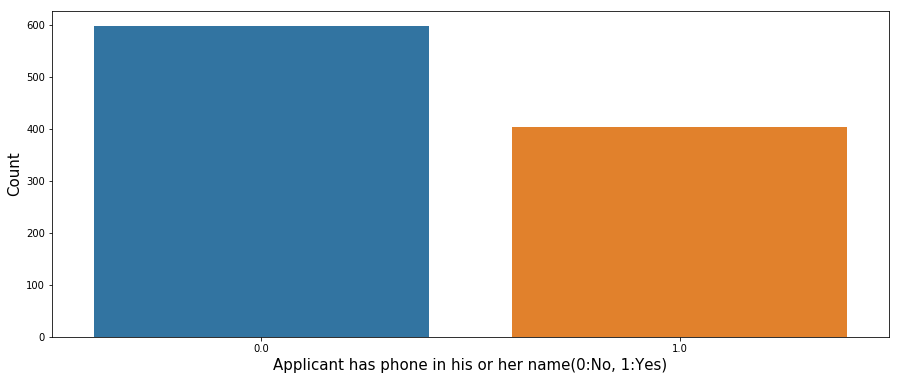

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(df["TELEPHONE"])
plt.xlabel("Applicant has phone in his or her name(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["TELEPHONE"].value_counts()

We can see that there are more number of applicant who does not have phone in his or her name

0.0    965
1.0     37
Name: FOREIGN, dtype: int64

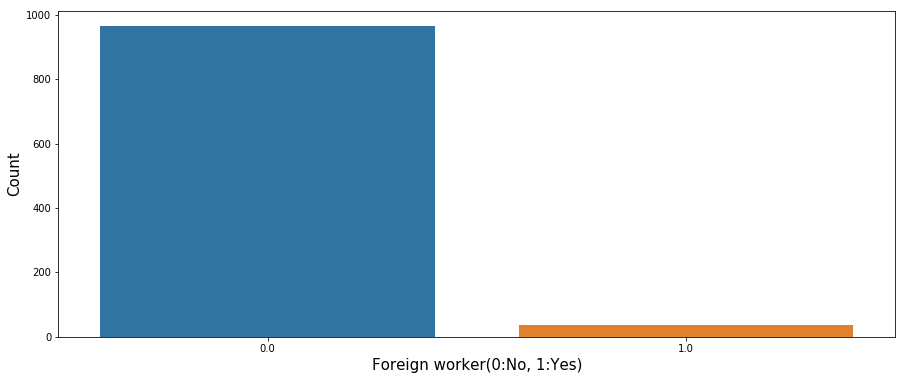

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(df["FOREIGN"])
plt.xlabel("Foreign worker(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["FOREIGN"].value_counts()

We can see that there are very few Foreign Worker

1.0    702
0.0    300
Name: RESPONSE, dtype: int64

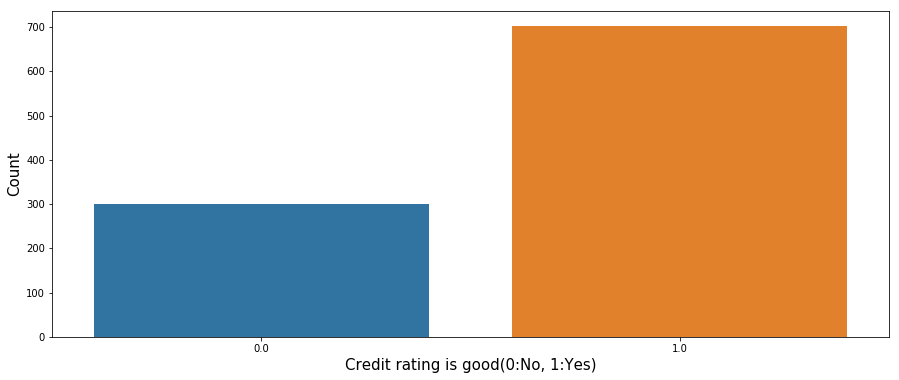

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(df["RESPONSE"])
plt.xlabel("Credit rating is good(0:No, 1:Yes)", fontsize=15)
plt.ylabel("Count", fontsize=15)

df["RESPONSE"].value_counts()

We can see that there are more number of employee who has good credit rating

# Creating Models

In [25]:
# Splitting the Dataset into training and testing part

# Features
x=df.drop("RESPONSE", axis=1)
# Target
y=df['RESPONSE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(801, 30)
(801,)
(201, 30)
(201,)


In [26]:
# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler() 
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [27]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))



for name, model in models:
    # Training the model
    model.fit(x_train,y_train)

    # Prediction
    y_pred=model.predict(x_test)
    
    print("Accuracy of {} is {:.2f} %" .format(name, model.score(x_test,y_test)*100))

Accuracy of LR is 74.13 %
Accuracy of LDA is 72.64 %
Accuracy of KNN is 72.14 %
Accuracy of CART is 65.17 %
Accuracy of NB is 69.65 %
Accuracy of RF is 67.16 %
Accuracy of SVM is 73.63 %


# Tree-based Feature Selection
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesRegressor regressor

Use ExtraTreesClassifier classifier for classification problem

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer)

In [28]:
# Feature Importance with Extra Trees Regressor
from pandas import read_csv
from sklearn.ensemble import ExtraTreesRegressor

# feature extraction
etr = ExtraTreesRegressor()
etr.fit(x, y)
etr_coef=etr.feature_importances_
print(etr_coef)

[0.13535909 0.08599774 0.05134811 0.02990447 0.01650268 0.02170136
 0.0202747  0.01502381 0.0136051  0.0611583  0.04855204 0.0561175
 0.03710421 0.01614839 0.02336581 0.01625398 0.01825134 0.02093217
 0.04515867 0.03084085 0.01863851 0.04827703 0.02725335 0.01083116
 0.0175299  0.03169729 0.03794605 0.01590042 0.02263987 0.00568611]


In [29]:
etr1_coef = pd.Series(etr_coef, index = x.columns)
etr1_coef

CHK_ACCT            0.135359
DURATION            0.085998
HISTORY             0.051348
NEW_CAR             0.029904
USED_CAR            0.016503
FURNITURE           0.021701
RADIO/TV            0.020275
EDUCATION           0.015024
RETRAINING          0.013605
AMOUNT              0.061158
SAV_ACCT            0.048552
EMPLOYMENT          0.056117
INSTALL_RATE        0.037104
MALE_DIV            0.016148
MALE_SINGLE         0.023366
MALE_MAR_or_WID     0.016254
CO-APPLICANT        0.018251
GUARANTOR           0.020932
PRESENT_RESIDENT    0.045159
REAL_ESTATE         0.030841
PROP_UNKN_NONE      0.018639
AGE                 0.048277
OTHER_INSTALL       0.027253
RENT                0.010831
OWN_RES             0.017530
NUM_CREDITS         0.031697
JOB                 0.037946
NUM_DEPENDENTS      0.015900
TELEPHONE           0.022640
FOREIGN             0.005686
dtype: float64

You can see that we are given an importance score for each attribute where the larger score the more important the attribute.

Text(0.5, 1.0, 'Feature importance using Extra Trees Regressor')

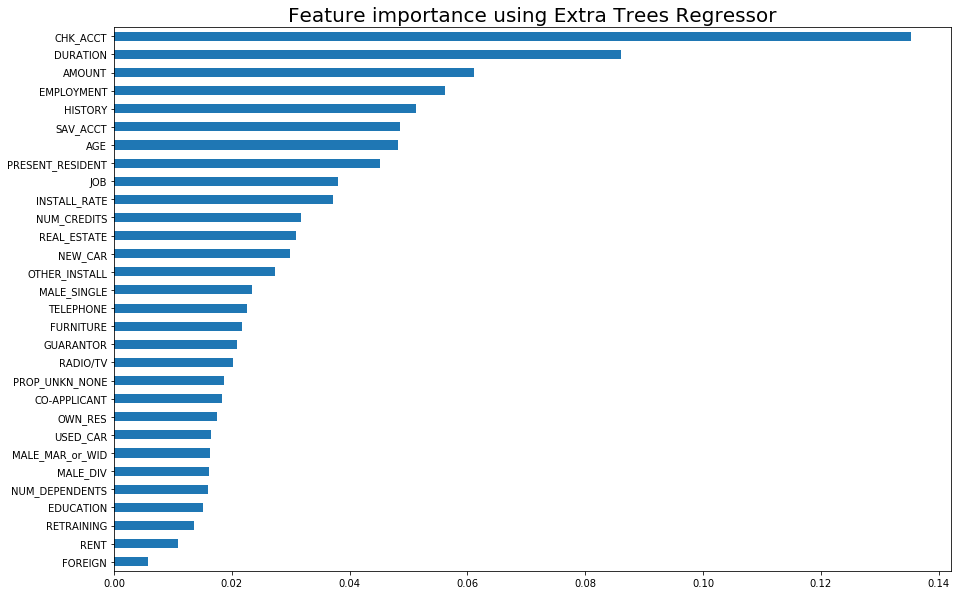

In [30]:
imp_coef = etr1_coef.sort_values()
plt.figure(figsize=(15, 10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Extra Trees Regressor", fontsize=20)

In [31]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(etr, prefit=True)
x_n = sfm.transform(x)
x_n.shape

(1002, 10)

In [32]:
#Spliting the dataset into a training set and a testing set
x_train,x_test,y_train,y_test=train_test_split(x_n,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

(801, 10)
(801,)
(201, 10)
(201,)


# Models with the selected features

In [33]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))


for name, model in models:
    # Training the model
    model.fit(x_train,y_train)

    # Prediction
    y_pred=model.predict(x_test)
    
    print("Accuracy of {} is {:.2f} %" .format(name, model.score(x_test,y_test)*100))

Accuracy of LR is 75.62 %
Accuracy of LDA is 74.63 %
Accuracy of KNN is 72.64 %
Accuracy of CART is 59.20 %
Accuracy of NB is 76.62 %
Accuracy of RF is 67.16 %
Accuracy of SVM is 74.63 %


In [34]:
'''
Model        Accuracy Before Feature Selection          Accuracy After Feature Selection
*******************************************************************************************
 LR                     74.13 %                                   75.62 %
 LDA                    72.64 %                                   74.63 %
 KNN                    72.14 %                                   72.64 %
 CART                   65.17 %                                   59.20 %
 NB                     69.65 %                                   76.62 %
 RF                     67.16 %                                   67.16 %
 SVM                    73.63 %                                   74.63 %
 
 Accuracy of LR, LDA, KNN, NB, SVM increases after feature selection whereas Accuracy of CART decreases anf for RF it remains same.
 
 After feature selection NB gives high accuracy so NB is good algorithm for this dataset.
 
LR: Logistic Regression
LDA: Linear Discriminant Analysis
KNN: K Nearest Neighbors Classifier
CART: Decision Tree Classifier
NB: Naive Bayes
RF: Random Forest Classifier
SVM: Support Vector Machine
'''
print()